In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
fakenews = pd.read_csv('Fake.csv')
truenews = pd.read_csv('True.csv')

In [4]:
fakenews.head(5)
fakenews.info()
fakenews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [5]:
fakenews['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [6]:
truenews.head(5)
truenews.info()
truenews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
truenews['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [8]:
fakenews['target'] = 0
truenews['target'] = 1

In [9]:
fakenews['text_length'] = fakenews['text'].apply(len)
truenews['text_length'] = truenews['text'].apply(len)

In [10]:
df = pd.DataFrame()
df = fakenews.append(truenews)
df = df.drop(columns=['date', 'subject'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_4396\456638506.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fakenews.append(truenews)


In [11]:
print(df)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text  target  text_length  
0      Donald Trump just couldn t wish all Americans ...       0         2893  
1      House Intelligence Committee Chairman Devin Nu...       0         1898  
2      On Friday, it was revealed that 

In [12]:
df['title_length'] = df['title'].apply(len)

In [13]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   target        44898 non-null  int64 
 3   text_length   44898 non-null  int64 
 4   title_length  44898 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ MB


,title,text,target,text_length,title_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,2893,79
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,1898,69
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,3597,90
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,2774,78
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,2346,70


In [14]:
df.groupby('target').mean()

,text_length,title_length
target,,
0,2547.396235,94.198032
1,2383.278517,64.667881


In [15]:
df.groupby('target').std()

,text_length,title_length
target,,
0,2532.884399,27.184433
1,1684.835730,9.168999


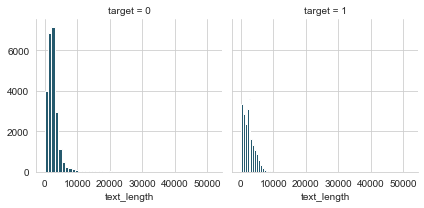

In [16]:
g = sns.FacetGrid(df, col='target')
g.map(plt.hist,'text_length', bins=50, color='#265a6e')

In [17]:
df[df['text_length']>=10000].count() / df['text_length'].count()

title           0.00784
text            0.00784
target          0.00784
text_length     0.00784
title_length    0.00784
dtype: float64

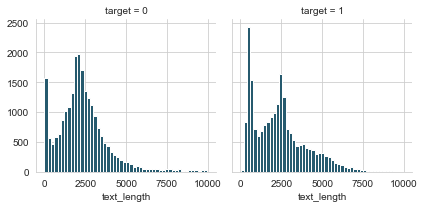

In [18]:
g = sns.FacetGrid(df.drop(df[df['text_length']>=10000].index ,inplace=False), col='target')
g.map(plt.hist,'text_length', bins=50, color='#265a6e')

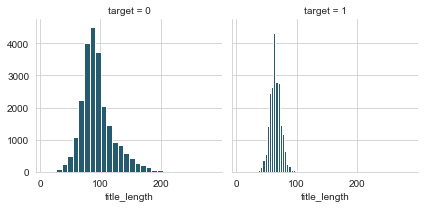

In [19]:
g = sns.FacetGrid(df, col='target')
g.map(plt.hist,'title_length', bins=30, color='#265a6e')

In [20]:
df[df['title_length']>=200].count() / df['title_length'].count()

title           0.001648
text            0.001648
target          0.001648
text_length     0.001648
title_length    0.001648
dtype: float64

<AxesSubplot:xlabel='target', ylabel='text_length'>

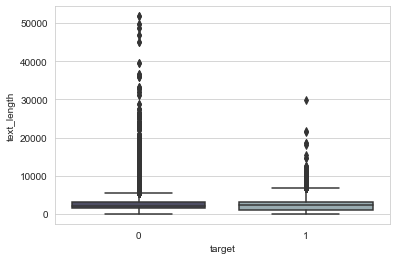

In [21]:
sns.boxplot(data=df, x='target', y='text_length', palette='bone')

In [37]:
X = df['text']
y = df['target']

In [38]:
print(X)

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44898, dtype: object


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [40]:
X = cv.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [43]:
print(X_train)

  (0, 35305)	2
  (0, 110796)	12
  (0, 59451)	1
  (0, 11659)	1
  (0, 76224)	2
  (0, 120293)	2
  (0, 12004)	32
  (0, 56939)	3
  (0, 14175)	1
  (0, 107766)	7
  (0, 50409)	30
  (0, 109171)	20
  (0, 46570)	1
  (0, 51717)	11
  (0, 107802)	33
  (0, 115144)	1
  (0, 43555)	2
  (0, 99289)	1
  (0, 79683)	4
  (0, 35020)	1
  (0, 100860)	1
  (0, 79135)	18
  (0, 86360)	5
  (0, 118225)	4
  (0, 16749)	4
  :	:
  (31427, 26597)	1
  (31427, 56383)	4
  (31427, 24359)	3
  (31427, 51189)	2
  (31427, 60875)	1
  (31427, 24358)	1
  (31427, 74641)	1
  (31427, 50309)	1
  (31427, 102253)	1
  (31427, 116800)	1
  (31427, 74988)	1
  (31427, 3991)	1
  (31427, 19326)	1
  (31427, 78663)	1
  (31427, 42318)	1
  (31427, 27146)	1
  (31427, 29901)	1
  (31427, 46379)	1
  (31427, 80942)	2
  (31427, 13263)	1
  (31427, 102500)	1
  (31427, 50318)	1
  (31427, 36506)	2
  (31427, 74838)	1
  (31427, 25361)	1


In [46]:
print(y_train)

15082    1
316      0
23372    0
19129    1
11585    0
        ..
12363    0
5695     0
8006     0
17745    0
17931    0
Name: target, Length: 31428, dtype: int64


In [47]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [48]:
nb.fit(X_train, y_train)

MultinomialNB()

In [49]:
nb_prediction = nb.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, nb_prediction))
print('\n')
print(confusion_matrix(y_test, nb_prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7106
           1       0.94      0.95      0.95      6364

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



[[6739  367]
 [ 290 6074]]
